# This file includes the following subjects:
### 1- Linear Regression with StatsModels
### 2- Linear Regression with sklearn
### 3- Feature selection in sklearn and standaridization (feature scaling)
### 4- Train and test split

In [1]:
# python packages (libraries) necessary for data science
import numpy as np  # a third party package for multidimensional arrays

import pandas as pd # enhances numpy even further, allows us to organize data in a tabular 
# form and to attach descriptive labels to the rows and columns not just numbers as it is with numpy
# suitable to work with different formats and missing data

import statsmodels.api as sm # a package built on top of numpt and scipy, which integrates with pandas,
# sm provides very good summaries, regression, educational purposes: helps understand sklearn easier

import matplotlib as plt # a 2D plotting library specially designed for visualization of numpy computations

import seaborn as sns # seaborn is a python visualization library based on matplotlib. it provides a high-level
# interface for drawing attractive statistical graphics.

import scipy  # numpy, pandas, and matplotlib are a part of a bigger library called scipy which is suitable for mathematics, machine learning, and engineering

import sklearn # (or scikit-learn ) is one of the most widely used machine learning libraries, regressions

### simple linear regression

### example 1

In [2]:
# import the relevent libraries
import numpy as np    # even if we are not going to use numpy, it is good to have it here
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm  # it is the library we will use when runnig regressions


In [3]:
# without runnig the below two lines we still get the graphs but they are based on matplotlib library
#but if we run it we get a better graphic design based on seaborn not matplotlib

# in the past seaborn was similar to matplotlib but after an update in 2017 this is no longer the case.
import seaborn as sns

# by using the below method we override the style and the graphics of all matplotlib graphs
sns.set()

In [6]:
# load the data: use the below method and put the full address of the file alog with its name,
# do not forget \\ instead of \
data = pd.read_csv('F:\\schulich\\python\\Udemy Data course\\required data bases\\1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [7]:
# describe method which is a pandas's method for each column in our data frame
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [8]:
# SAT score = Critical Reading + writing + mathematics
# GPA score = Grade Point Average (at graduation from university)
# we think that by knowing SAT we can predict GPA
# we need to run a regression model

In [9]:
# define dependent and independent variable and feed them to our variables
# X = independent varibale = SAT
# Y = dependent variable = GPA
Y = data['GPA']  # when we have a table : we can assign each column to one vector variable 
X1 = data['SAT']

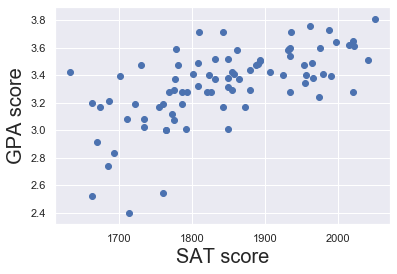

In [10]:
# Explore the data to get some sense about it
plt.scatter(X1,Y) # create a scatter plot with our X and Y vector variables

# add label to each axe, x and y
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

In [11]:
# Regression itself
# our first X is only one variable which is SAT (assumig X1) but we need to add another X0 as a constant
# regression model : Y = Bo + B1*X1 ==> Y = Bo*X0 + B1*X1 where X0 is a vector variable X0 = (1,1,...,1)

# so far we have X1 but we need X = (X0, X1) so we need to add a constant variable to X1 and introduce a new vector 
# variable called X
X = sm.add_constant(X1)

results = sm.OLS(Y,X).fit()   # each Ordinary Least Square regression analysis has different parameters as output (result)
# fit() will apply a specific estimation technique (OLS in this case) to obtain the fit of the model

results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           7.20e-11
Time:                        23:51:02   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X = sm.add_constant(X1)  # we add this line to show what this method add_constant does
X

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


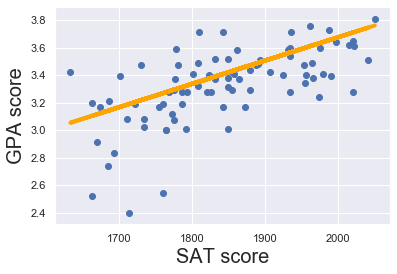

In [13]:
# lets plot the regression line on our scatter plot
plt.scatter(X1,Y) 

y_hat = 0.0017*X1 + 0.275 # using above result : SAT coef = 0.0017 & const coef = 0.2750

# add the regression line to our scatter plot
plt.plot(X1, y_hat, lw=4, c='orange', label='Regression Line') 

# add label to each axe, x and y
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

### Multilinear regression 
### example 1

In [14]:
# adding new variables increases R-squared regarldless of it this new variable is really useful or not
# let prove it here,
# we have a new data set SAT GPA adding a new random variable with no relationship with GPA

import numpy as np    
import pandas as pd 
import statsmodels.api as sm  # it is the library we will use when runnig regressions



In [17]:
# load new data set

data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [18]:
Y = data['GPA']  # when we have a table : we can assign each column to one vector variable 

X1_X2 = data[['SAT', 'Rand 1,2,3']] # note that all x1, x2, ... will be add to X1_X2, no need to introduce X2 spearately

X1_X2

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


In [19]:
X = sm.add_constant(X1_X2) # introduce a new matrix including X1_X2 (x1 and x2) and X0 = 1 (cosntant)
X.head()

,const,SAT,"Rand 1,2,3"
0,1.0,1714,1
1,1.0,1664,3
2,1.0,1760,3
3,1.0,1685,3
4,1.0,1693,2


In [20]:
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           6.58e-10
Time:                        23:53:26   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# according to the above report as you can see R-squared has increased from 0.406 to 0.407
# not only the model has not improved but rather it has deteriorated: we can see from adjusted 
# adjusted R-squared 0.399 vs 0.396, indicating that using the new variable was not a good idea,
# the p-value of new variable (Rand 1,2,3) also confirms that there is no significant relationship 
# between rand 1,2,3 and GP. so we need to eliminate it (P-value = 0.762) > (alpha = 0.05) accept H0: coefficient = 0

# why adjusted R-squared decreased, because adjusted R-squared penalizes the model for adding new variables
# that have no strong explanatory power unlike R-squared

# if p-value is high and adjusted-R-squared so drop the new variable

### multilinear regression
### example 2

In [22]:
# multilinear regression second example with meaningful variables not random
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [23]:
data = pd.read_csv('F:\\schulich\\python\\Udemy Data course\\required data files\\real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [24]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [25]:
# Declare the dependent and the independent variables
y = data['price']
X1_X2 = data[['size','year']]    # X1_X2 = [X1, X2]

In [27]:
x = sm.add_constant(X1_X2)
results = sm.OLS(y,x).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.77e-32
Time:                        23:54:09   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### using logarithm to solve homoscedasticity problem

In [28]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [29]:
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\homoscedasticity.csv')
data.head()

,X,Y
0,1,500
1,1,1000
2,2,3000
3,2,4000
4,2,6000


In [30]:
data.describe()

,X,Y
count,66.000000,66.000000
mean,6.545455,13901.515152
std,2.500350,10938.014057
min,1.000000,500.000000
25%,5.000000,6000.000000
50%,7.000000,10000.000000
75%,8.000000,19500.000000
max,10.000000,50000.000000


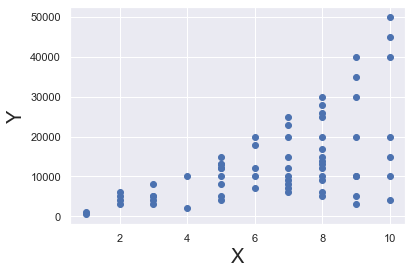

In [31]:
Y = data['Y']   
X1 = data['X']

plt.scatter(X1,Y) 

plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)

plt.show()

In [32]:
Log_Y = np.log(data['Y'])
Log_X1 = np.log(data['X'])

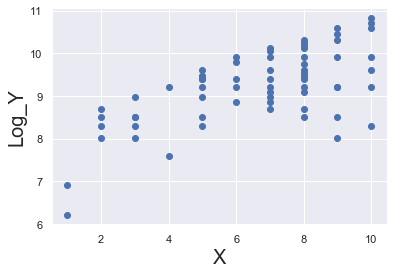

In [33]:
# Semi-log model 
plt.scatter(X1,Log_Y) 

plt.xlabel('X', fontsize = 20)
plt.ylabel('Log_Y', fontsize = 20)

plt.show()

# as you can see this log transformation has reduced homoscedasticity to some extent
# log (Y-hat) = bo + b1*X1

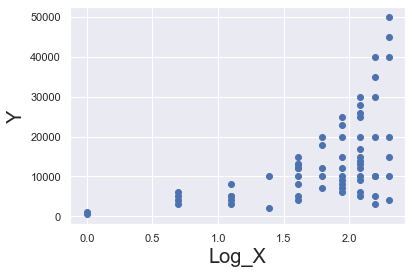

In [34]:
# semi-log model
plt.scatter(Log_X1,Y) 

plt.xlabel('Log_X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)

plt.show()

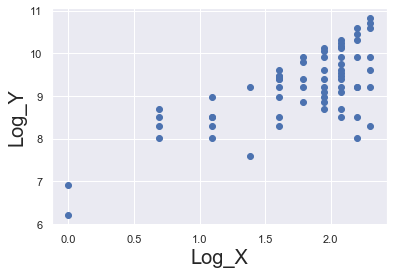

In [35]:
# log-log model
plt.scatter(Log_X1,Log_Y) 

plt.xlabel('Log_X', fontsize = 20)
plt.ylabel('Log_Y', fontsize = 20)

plt.show()

#log-log model : for 1 percent increase in X, Y increases by b1 percent : elacticity concept in economics

In [36]:
# we do logarithm trasformation for either or both Y and X and by looking at their
# scatter plot we decide which one fits the data best. 

### linear regression with categorical variables (dummy variables)

In [37]:
# using dummy variables to enter categorical variables into our regression model
# in our SAT GPA model, we want to use ATTENDEANCE as a categorical data as it is yes or no
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [38]:
# if the student attended more than 75% of the lessons it is yes, otherwise attendence is no
raw_data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.03. Dummies.csv')
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [39]:
# we assign 0  to no and 1 to yes
# but before any change we keep the original data as our raw_data in case
data = raw_data.copy() # this method copies data file in a new file called data

# to assign numbers to categories we use a method called map whose input is a dictionary
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
data  
# here attendance is a dummy variable

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [40]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [41]:
Y = data['GPA']
X1 = data['SAT']
X2 = data['Attendance']
X1_X2 = data[['SAT', 'Attendance']]


In [42]:
# so far we have X1_X2 = (SAT, Attendance) but we need X = (X0, X1_X2) so we need to add a constant variable to X1_X2 and introduce a new matrix variable
# variable called X
X = sm.add_constant(X1_X2)
# fit the regression
results = sm.OLS(Y,X).fit()
# Get the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.19e-15
Time:                        23:55:01   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# according to the above summary:
# Adj. R-squared: 0.399  increased to 0.555 : great improvement
# Prob(F-statistics) or P-value F = 2.19e-15 almost zero, reject H0 : overal model is significant
# P-value SAT coefficient and p-value Attendence coefficient are bot almost 0.000: SAT and Attendence variables are significant
# GPA = 0.6439 + 0.0014*SAT + 0.2226*Attendence

# as we have only two values for our dummy variale we can have two regression equations and two lines
# attendence=yes=1 : GPA = 0.6439 + 0.0014*SAT + 0.2226*1 => GPA = 0.8665 + 0.0014*SAT
# attendence=no=0 : GPA = 0.6439 + 0.0014*SAT + 0.2226*0 => GPA = 0.6439 + 0.0014*SAT

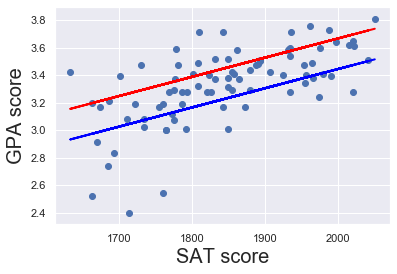

In [44]:
# lets draw two obtained lines on our scatter plot

plt.scatter(X1, Y)

# indroducing our two lines
yhat_no_attendence = 0.6439 + 0.0014*X1
yhat_yes_attendence = 0.8665 + 0.0014*X1

#draw lines on our scatter plot
plt.plot(X1, yhat_no_attendence, lw=2, c='blue')
plt.plot(X1, yhat_yes_attendence, lw=2, c='Red')

#add label to axes
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

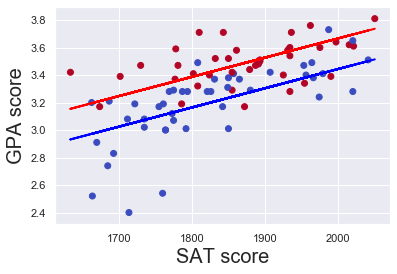

In [45]:
# you can also change the scatter plot in a way that students who have attended courses have different colors with who did not attend
plt.scatter(X1, Y, c=X2, cmap = 'coolwarm')

# indroducing our two lines
yhat_no_attendence = 0.6439 + 0.0014*X1
yhat_yes_attendence = 0.8665 + 0.0014*X1

#draw lines on our scatter plot
plt.plot(X1, yhat_no_attendence, lw=2, c='blue')
plt.plot(X1, yhat_yes_attendence, lw=2, c='red')

#add label to axes
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

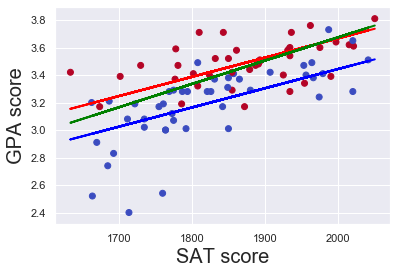

In [46]:
# you can also change the scatter plot in a way that students who have attended courses have different colors with who did not attend
plt.scatter(X1, Y, c=X2, cmap = 'coolwarm')

# indroducing our two lines
yhat_no_attendence = 0.6439 + 0.0014*X1
yhat_yes_attendence = 0.8665 + 0.0014*X1

#we want to add the regression line with out considering attendence variacle
yhat_without_dummy_variable = 0.275 + 0.0017*X1

#draw lines on our scatter plot
plt.plot(X1, yhat_no_attendence, lw=2, c='blue')
plt.plot(X1, yhat_yes_attendence, lw=2, c='red')
plt.plot(X1, yhat_without_dummy_variable, lw=2, c='green')

#add label to axes
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

In [47]:
# making predictions based on the regression model that we just created
X

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [48]:
# to make prediction lets say:
# we have two new students: 
# first student (name: Bob): SAT = 1700 did not attend more the 75% of the course (attendence = no or 0)
# second student (name: Alice): SAT = 1670 but attended more the 75% of the course (attendence = yes or 1)

# first of all, we orgnize these new information in the form of a DataFrame to make it more orgnized 

new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendence':[0,1]})
new_data

,const,SAT,Attendence
0,1,1700,0
1,1,1670,1


In [49]:
# instead of indices : 0 and 1 we replace them with the name of our students
new_data.rename(index={0: 'Bob', 1: 'Alice'})


,const,SAT,Attendence
Bob,1,1700,0
Alice,1,1670,1


In [50]:
# in order to do prediction we use method predict

# as you remeber: results = sm.OLS(Y,X).fit()
prediction_of_new_data_results = results.predict(new_data)
prediction_of_new_data_results

0    3.023513
1    3.204163
dtype: float64

In [51]:
# to make the prediction results more orgnized with can add it to the above DataFrame

#first we change thie prediction results into a small data frame
prediction_of_new_data_results_DataFrame = pd.DataFrame({'Predictions':prediction_of_new_data_results})
prediction_of_new_data_results_DataFrame

,Predictions
0,3.023513
1,3.204163


In [52]:
#second: we join this small data fram to our original data frame along with other information
joined_new_dataFrame = new_data.join(prediction_of_new_data_results_DataFrame)
joined_new_dataFrame
joined_new_dataFrame.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendence,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


### Scikit learn (sklearn) library
### example: single linear regression with sklearn

In [53]:
# import the relevant libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import required materials to create linear regression witk sklearn (sklearn is scikit learn)
from sklearn.linear_model import LinearRegression  # note that the term LinearRegression is with capital L and R

In [54]:
#load data
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [55]:
# create the regression
# declare the independent and dependent variables
X = data['SAT']
Y = data['GPA']

In [56]:
# this regression we want to create is a supervised Machine Learning
# in supervised ML we have feature and target
# our feature is our input which is our independent variable
# our target is our output which is our dependent variable
print(X.shape)
print(Y.shape)
# as you see they are both vectors of the length 84

(84,)
(84,)


In [57]:
# sklearn works with matrix not vector, so we need to reshape the above vectors to matrix
# in other words we reshape a 1-dimensional object to a 2-dimensional object
X_matrix_we_know_the_number_of_observations = X.values.reshape(84,1)
X_matrix_we_know_the_number_of_observations.shape

(84, 1)

In [58]:
# but the sklearn suggests that we use the below method to shape from vector to matrix, we do not need to know the number
# of observations
X_matrix = X.values.reshape(-1,1) 
X_matrix.shape


(84, 1)

In [59]:
# in order to see what reshape method does see the below example
# we extarct the first five items of X to use a small data only for test
X_head_five = X[:5]
X_head_five

0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64

In [60]:
X_matrix_head_five = X_head_five.values.reshape(-1,1)
X_matrix_head_five

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693]], dtype=int64)

In [61]:
# we need to create an instance (object) of the LinearRegression class
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# fit the regression
reg.fit(X_matrix,Y)  # note that in statsmodel the order was first Y then X but is sklearn first X the Y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# let's discuss the parameters of the above LinearRegression a little bit

# normalize = False : standardization or normalization is the process of subtracting the mean and dividing by the standard deviation
# in this case we subtract the mean but divide by the L2-norm of the inputs(for more information google it)

# copy_X = True : as you remember in our sm regression we copied the original data set in another data set, but sklearn does it automatically
# this is a safety net against normalization and other transformations that can be done by sklearn while creating the algorithm

# fit_intercept = True: as you remember in our statsmodel library we had to add constant manually, but sklearn takes care of it precisely
# if you do not want intercept, you can change it to false

# n_jobs = None: n_jobs is a parameter used when we want to parallelize routines,by default onle one CPU is used,but when you are dealing with a
# lot of data and have access to more than one CPU you can take advantage of that by setting n_jobs = 2 or 3 or ...

In [64]:
# R-squard
# to get the R-squared we use score method
reg.score(X_matrix,Y)

0.40600391479679765

In [65]:
# Coefficient
# to get the coefficients we use coef_
reg.coef_

array([0.00165569])

In [66]:
# intercept
# to obtain the intercept we use intercept_
reg.intercept_

0.2750402996602803

In [67]:
# making predictions for one variable
reg.predict([[1740]])

array([3.15593751])

In [68]:
# making predictions for more than one variable
reg.predict([[1740],[1760]])

array([3.15593751, 3.18905127])

In [69]:
# making predictions for more than one variable in the form of a Data Frame
# first build a data fram for your new data
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [70]:
prediction_of_new_data_results = reg.predict(new_data)
prediction_of_new_data_results

array([3.15593751, 3.18905127])

In [71]:
# you can also add the results of this prediction to your data frame
new_data['Predicted_GPA'] = prediction_of_new_data_results
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


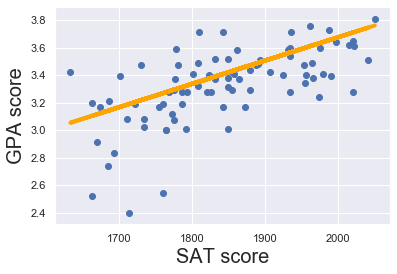

In [72]:
# you can plot the regression using the same method as before
# lets plot the regression line on our scatter plot
plt.scatter(X,Y) 

y_hat = 0.0017*X + 0.275 # using above result : SAT coef = 0.0017 & const coef = 0.2750

# add the regression line to our scatter plot
plt.plot(X, y_hat, lw=4, c='orange', label='Regression Line') 

# add label to each axe, x and y
plt.xlabel('SAT score', fontsize = 20)
plt.ylabel('GPA score', fontsize = 20)

plt.show()

### example: multilinear regression with one unrelevant random variable

In [73]:
# Multiple linear regression with sklearn
# import the relevant libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import required materials to create linear regression witk sklearn (sklearn is scikit learn)
from sklearn.linear_model import LinearRegression  # note that the term LinearRegression is with capital L and R

In [74]:
# load new data set
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [75]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [76]:
# create the regression
# declare the independent and dependent variables
X = data[['SAT','Rand 1,2,3']]
Y = data['GPA']
X.head()

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2


In [77]:
# we need to create an instance (object) of the LinearRegression class
reg = LinearRegression()


In [78]:
# fit the regression
# sklearn is optimized for multilinear regression, in multilinear regression our X is a matrix rather than a vector,
# so there is no need to use reshape to change it to a matrix shape
reg.fit(X,Y)  # note that in statsmodel the order was first Y then X but is sklearn first X the

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Coefficient
# to get the coefficients we use coef_
coefficient = reg.coef_
print('Coefficient = ' + str(coefficient)) # the order of answers are in order of variables in oue X data set
# intercept
# to obtain the intercept we use intercept_
intercept = reg.intercept_
print('Intercept = ' + str(intercept))

Coefficient = [ 0.00165354 -0.00826982]
Intercept = 0.29603261264909486


In [80]:
# R-squared
# score meathod in sklearn returns different values which shows how well the overal model is performing
# in linear regression the score method returns R-squared
R_squared = reg.score(X,Y)
print('R-squared = ' + str(R_squared))

R-squared = 0.4066811952814285


In [81]:
# how to calculate adjusted R-squared
# using its mathematical formula

In [82]:
# we can write formula in markdown by putting formula beween $ 

### Formula for adjusteted R-squared
$R^2_{adj}. = 1 - (1-R^2)*\frac{n-1}{n-p-1}$
#### n = number of observations
#### p = number of predictors (number of independent variables)

In [83]:
# in order to find n and p we can use our X shape
X.shape

(84, 2)

In [84]:
R_squared = reg.score(X,Y)
n = X.shape[0]
p = X.shape[1]
adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - p - 1)
print('Adjusted_R_squared = ' + str(adjusted_R_squared))

Adjusted_R_squared = 0.39203134825134023


In [85]:
# as you see our adjusted_R_squared is considerably lower than our R-squared
# it means that one or more of the predictors have little or no explanatory power


### Feature selection
### 1 - feature selection with p-value

In [86]:
# feature selection detect unneded variables (or unimportant featues) to be disregarded
# we use feature selection to simplify the model in order to imporve speed and avoid unwanted ML issues with too many features


In [87]:
# feature selection in statsmoldel: we use p-value of each feature if p-value>0.05 disregard the feature
# but in sklearn we use F-regression

In [88]:
# Feature selection in sklearn (F-regression)
# F-regression creates single linear regressions of each feature and the dependent variable
# in the above SAT GPA example F-regression create two regressions, GPA->SAT, and GPA->Rand123
# and the calculate p-values of each and compare it to 0.05


In [89]:
# F-regression
# import F-Regression
from sklearn.feature_selection import f_regression

In [90]:
# conduct the f-regression
f_reg = f_regression(X,Y)
f_reg
# we get two output arrays
# the first array refers to f-statistic in which we are not interested
# the second array refers to our p-values 

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [91]:
# as we only want to work with p-values we extact thier array from the above output
p_values = f_reg[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [92]:
# we are not interested is scientific notation e-11 ... so we round them to three digits after decimal point
p_values_rounded = p_values.round(3)
p_values_rounded

array([0.   , 0.676])

In [93]:
# as you can see from the above results p-value RAND coefficient = 0.676 > 0.05
# so we indentify RAND123 as an unneded variable that should be disregarded. 
# note that these are univariate p-values from simple lineer models, and they 
# donot reflect the interconnections of the features in our multiple linear regression
# in multiple linear regression p-value RAND = 0.762 but in f-regression p-value RAND = 0.676
# so f-regression should be used with more caution as it is one bit too simplistic for more complicated problems.

In [94]:
# now we want to create a summary table for our results
reg_summary = pd.DataFrame(data = X.columns.values, columns=["Features"])
# we can write data=['SAT', 'Rand 1,2,3'] instead of data=Z.columns.values
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [95]:
# add another column called coefficient
reg_summary['Coefficients'] = reg.coef_
reg_summary

,Features,Coefficients
0,SAT,0.001654
1,"Rand 1,2,3",-0.008270


In [96]:
# add p-value columns
reg_summary['p-values'] = p_values_rounded
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


In [97]:
# calculating p-vlaue by sklearn for multiple regression and not f-regression
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn import linear_model

In [98]:
# load new data set
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [99]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
X = data[['SAT','Rand 1,2,3']]

# and a single depended variable: 'GPA'
Y = data['GPA']

In [100]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [101]:
# When we create the regression everything is the same
reg_with_pvalues = LinearRegression()
reg_with_pvalues.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
# The difference is that we can check what's contained in the local variable 'p' in an instance of the LinearRegression() class
reg_with_pvalues.p

array([0.        , 0.75717067])

In [103]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['SAT'],['Rand 1,2,3']],columns =['Features'])
# Then we create and fill a second column, called 'Coefficients' with the coefficients of the regression
reg_summary['Coefficients'] = reg_with_pvalues.coef_
# Finally, we add the p-values we just calculated
reg_summary['p-values'] = reg_with_pvalues.p.round(3)

In [104]:
# This result is identical to the one from StatsModels
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.757


### Standardization (feature scaling)
$ x^{scaled}_{ij}=\frac{x_{ij}-\bar{x_j}}{S_j} $
### feature scaling is a way for feature scaling

In [105]:
# as we deal with numeriacal data we may face different magnitutes, 
# we standardize data to make better sense of data and make it more efficient for our machine learning model
# in order to standardize our numerical data we can use the above formula
# the mean of our standardized data is 0 and its standard deviation is 1, so negative numbers are
# below average, positive numbers are above average, numbers higher than 1 or lower than -1 are too big or too small


In [106]:
# Multiple linear regression with sklearn
# import the relevant libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import required materials to create linear regression witk sklearn (sklearn is scikit learn)
from sklearn.linear_model import LinearRegression  # note that the term LinearRegression is with capital L and R

In [107]:
# load new data set
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [108]:
# declare the independent and dependent variables
X = data[['SAT','Rand 1,2,3']]
Y = data['GPA']

In [109]:
#standardization
from sklearn.preprocessing import StandardScaler # note two capital S letters

In [110]:
# crating an empty standard scaler
# this object will use the formula and subtract the mean and divide by standard deviation
scaler = StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
# fit our data into our scaler object 
# so it is not an empty object anymore,it will contain information about mean and standard deviation 
scaler.fit(X)  # X must be a matrix

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
# using transform method for standardizing (scaling) X
X_scaled = scaler.transform(X)
X_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [113]:
# now we run the regression using sklearn with our scaled features
reg = LinearRegression() #create empty object
reg.fit(X_scaled,Y) # filling our empty object with our data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [115]:
reg.intercept_

3.330238095238095

In [116]:
# creating a summary table
# in machine learnig we use bias instead of intercept, 
reg_summary = pd.DataFrame(data=[['intercept (bias)'],['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary

,Features
0,intercept (bias)
1,SAT
2,"Rand 1,2,3"


In [117]:
# add weight to our Data Frame
# what is weights: it is machine learning word for standardized coefficient
# the bigger the weight the bigger the impact of its associated feature
# we change the name of intercept to bias and the name of coefficient to weight because using these new naming conventions
# we can conveniently distinguish between a regular coefficient summary table and this new standardized summary table based
# machine learnig terms

reg_summary['Weights (coefficient)'] = reg.intercept_, reg.coef_[0], reg.coef_[1]
reg_summary

,Features,Weights (coefficient)
0,intercept (bias),3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [118]:
# interpretation of the above standardized table:
# the closer a weight to zero, the smaller its impact and the bigger the weight the bigger its impact
# so we can use this method as another feature selection method in which we can eliminate features with low impact
# in above example the weight of Rand 1,2,3 is close to zero so it is useless we can keep it or eliminate it, 
# no considerable contribution to our model. but most people prefer eliminate them since the might bias the model even a bit.
# when we perform feature scaling, we do not care if a useless variable is there or not. and that is why sklearn does not 
#calculate p-value, because proffesinal data scientits do feature scaling before conducting regression, and do not care
# about p-value because the scaling penalize useless variables automatically

In [119]:
# making prediction using the above standardized model
# for example we want to predict GPA for SAT 1700 Rand 2, and SAT 1800 Rand 1
# first we define these two new data in the form of a dataframe
new_data = pd.DataFrame(data=[[1700,2],[1800,1]], columns=['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [120]:
# before making the prediction, we need to scale (standardize) our new data base on our prevouis calculated mean and std
# as we already have made scaler object, we just need to transform the new data
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [121]:
# now new data is ready for making prediction
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

In [122]:
# what if we remove Rand 1,2,3:
# theory suggest that as its weight is too small, nothing will change, let's see
reg_without_rand = LinearRegression()

# our X is only SAT so we need to change its form from a vector to a matrix
X_SAT_scaled_matrix = X_scaled[:,0].reshape(-1,1)


In [123]:
# do the regression
reg_without_rand.fit(X_SAT_scaled_matrix,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# Predict the new data
new_data = new_data = pd.DataFrame(data=[[1700,2],[1800,1]], columns=['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [125]:
# before making the prediction, we need to scale (standardize) our new data base on our prevouis calculated mean and std
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [126]:
# we need to eliminate Rand1,2,3 from our new data
new_data_scaled_without_Rand = new_data_scaled[:,0]
new_data_scaled_without_Rand

array([-1.39811928, -0.43571643])

In [127]:
# we need to change the form from vector to matrix
new_data_scaled_without_Rand_matrix = new_data_scaled_without_Rand.reshape(-1,1)
new_data_scaled_without_Rand_matrix

array([[-1.39811928],
       [-0.43571643]])

In [128]:
# now our new data is ready for making prediction
reg_without_rand.predict(new_data_scaled_without_Rand_matrix)

array([3.08970998, 3.25527879])

In [129]:
# as you can see from the comparison between with and without Rand regression we get very close 
# results:      array([3.09051403, 3.26413803])
# without rand: array([3.08970998, 3.25527879]) 
# the above results show that why sklearn users decided that p-values are not needed

### Train and split
### a way to detect overfitting

In [130]:
# overfitting means that our model has high accuray only for our traning data set
# but when we test the model with our test the model with our test data set, its accuracy is low
# usually we randomly split the data as 10% or 20% test and the rest will be used to train and build our model

In [131]:
# import the relevent libraries
import numpy as np
from sklearn.model_selection import train_test_split

In [132]:
# lets generate some data we are going to split
X = np.arange(1,101,1)  
# this is like A = range(1,101,1) the only differnce is that arange is an array
# while range is a list not array
X


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [133]:
# Generate another array
Y = np.arange(501, 601, 1)
Y

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [134]:
# split the data 
X_train, X_test = train_test_split(X, test_size= 0.2, shuffle = True, random_state=42)  
# test_size = 0.2 ==> 80% train 20% test
# one of the other points about split method is that each time we run the method we will get a different data set, which is 
# in contradictory with our test and train split goal in which we want to measure the accuracy of the model for data that
# has been never seen by the model and are completely new for our model
# so we need to change the method to get the same shuffle each time we run it: random_state = 42 : just always use the same number

In [135]:
# let's explore the results
X_train.shape, X_test.shape

((80,), (20,))

In [136]:
X_train    # both train and test arrays are randomly shuffled

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [137]:
X_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [138]:
# some times when we are working with time series data the order of the array is of utmost importance
# split the data without shuffling
X_train_unshuffled, X_test_unshuffled = train_test_split(X, test_size= 0.2, shuffle = False) 
# test_size = 0.2 ==> 80% train 20% test

In [139]:
X_test_unshuffled

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

In [140]:
# except in time series, most of the time we prefer the shulffled data to follow the rule of randomness in sampling

In [141]:
# we can also use one split method to split more than one array
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, shuffle = True, random_state=42)  